# 猫狗识别的模型

将原始文件放入指定的目录中

In [5]:
import os, shutil, pathlib

original_dir = pathlib.Path("./_data/raw_data/train")
formatted_dir = pathlib.Path("./_data/formatted_data")


def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = formatted_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)] 
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=10000)


In [10]:
make_subset("validation", start_index=10000,end_index=12000)
make_subset("test", start_index=12000,end_index=12500)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


2024-03-17 10:58:22.252821: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-17 10:58:22.440471: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-17 10:58:22.440589: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-17 10:58:22.443344: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-17 10:58:22.443416: I external/local_xla/xla/stream_executor

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [9]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [13]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    formatted_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    formatted_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    formatted_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 20000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [15]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(10000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [16]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [17]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [18]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [19]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [20]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2024-03-17 11:08:29.132023: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-03-17 11:08:31.071628: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fdf5c76f400 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-17 11:08:31.071675: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-03-17 11:08:31.427404: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710644912.124219    5894 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 26s 32ms/step - loss: 0.6210 - accuracy: 0.6403 - val_loss: 0.5167 - val_accuracy: 0.7420
Epoch 2/30
625/625 [==============================] - 20s 31ms/step - loss: 0.4652 - accuracy: 0.7814 - val_loss: 0.3945 - val_accuracy: 0.8190
Epoch 3/30
625/625 [==============================] - 20s 31ms/step - loss: 0.3453 - accuracy: 0.8446 - val_loss: 0.3063 - val_accuracy: 0.8645
Epoch 4/30
625/625 [==============================] - 20s 31ms/step - loss: 0.2690 - accuracy: 0.8844 - val_loss: 0.3856 - val_accuracy: 0.8510
Epoch 5/30
625/625 [==============================] - 20s 32ms/step - loss: 0.2158 - accuracy: 0.9121 - val_loss: 0.2809 - val_accuracy: 0.8823
Epoch 6/30
625/625 [==============================] - 20s 32ms/step - loss: 0.1714 - accuracy: 0.9305 - val_loss: 0.2556 - val_accuracy: 0.8957
Epoch 7/30
625/625 [==============================] - 20s 31ms/step - loss: 0.1376 - accuracy: 0.9463 - val_loss: 0.2465 - val_accuracy: 0.9013
Epo

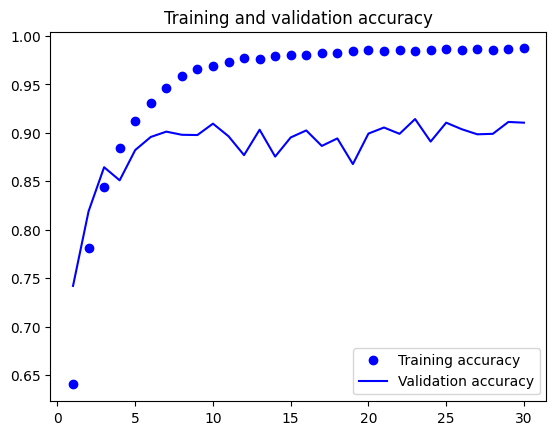

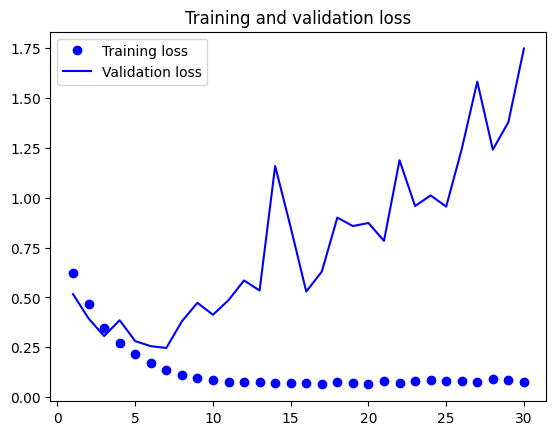

In [21]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 34ms/step - loss: 0.2587 - accuracy: 0.9050
Test accuracy: 0.905
